In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
df=pd.read_csv('Algerian_forest_fire_cleaned_dataset.csv')

In [47]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [51]:
df_copy=df

In [53]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [55]:
df_copy.drop(['day','month','year'],axis=1,inplace=True)

In [57]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [59]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    object 
 11  Region       243 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 22.9+ KB


In [61]:
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [63]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int64  
 11  Region       243 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 22.9 KB


In [65]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [67]:
X=df_copy.drop('FWI',axis=1)
y=df_copy['FWI']

In [69]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [71]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [77]:
X_train.shape,X_test.shape,y_train.shape

((182, 11), (61, 11), (182,))

In [79]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

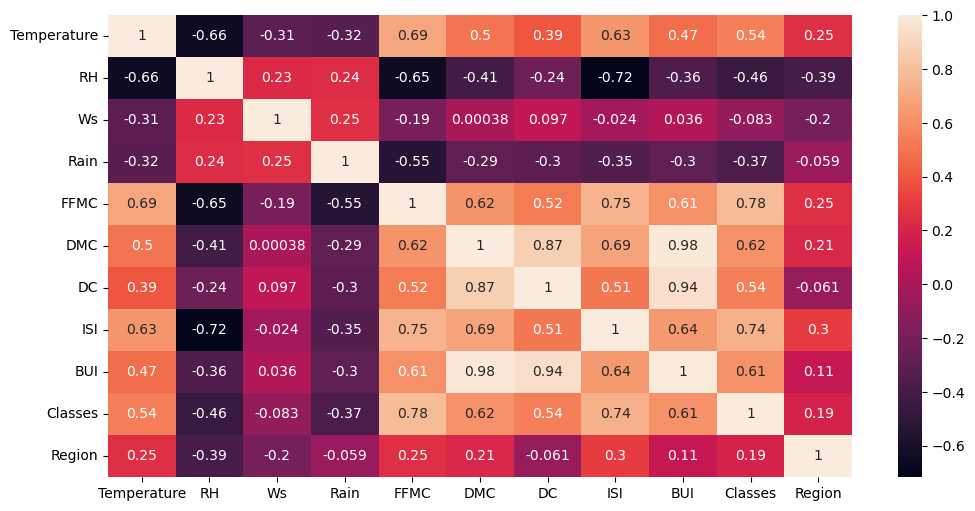

In [81]:
plt.figure(figsize=(12,6))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [95]:
def correlation (dataset, threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                col_name=corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr 

In [97]:
corr_features=correlation(df_copy,0.85)

In [99]:
corr_features

{'BUI', 'DC', 'FWI'}

In [101]:
corr_features=correlation(X_train,0.85)
corr_features

{'BUI', 'DC'}

In [103]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
print(X_train.shape,X_test.shape)

(182, 9) (61, 9)


Feature Scaling--->

In [108]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

Box plot to understand the effect of Scaler

Text(0.5, 1.0, 'X_train before scaling')

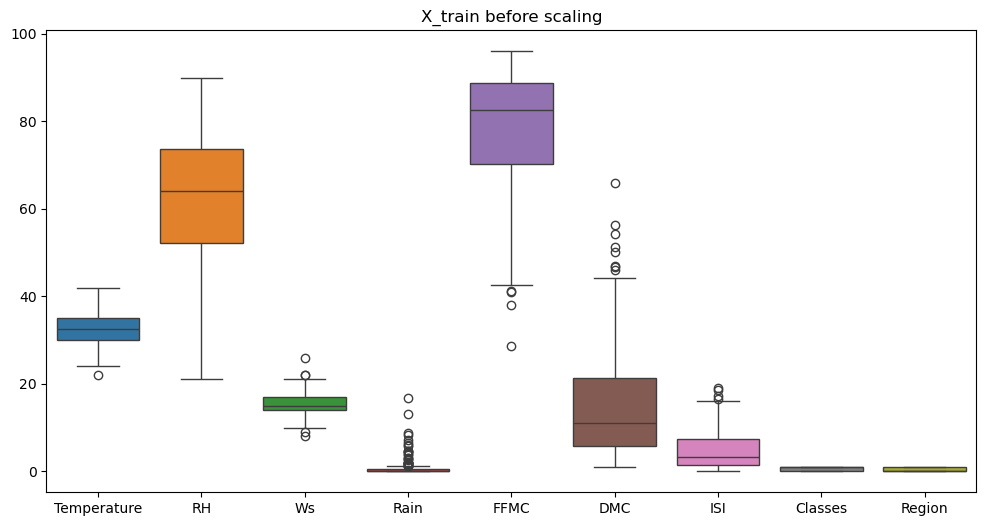

In [122]:
plt.subplots(figsize=(12,6))
#plt.subplot(1,1,1)
sns.boxplot(data=X_train)
plt.title("X_train before scaling")

<Axes: >

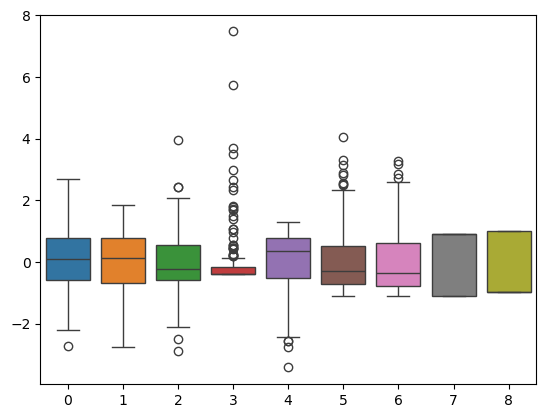

In [124]:
sns.boxplot(data=X_train_scaled)


Mean Absolute Error 0.9939450225331421
r2 score 0.9694992580300276


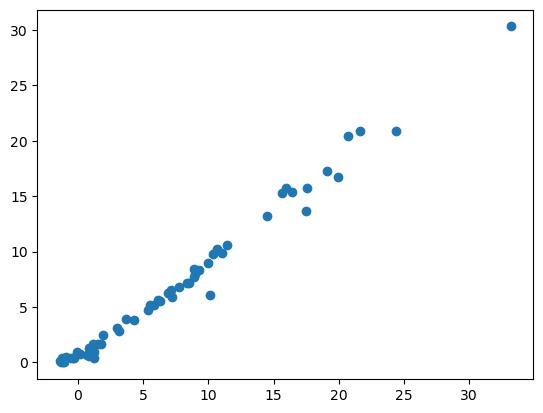

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linear_regression=LinearRegression()
linear_regression.fit(X_train_scaled,y_train)
y_pred=linear_regression.predict(X_test_scaled)
mae=mean_absolute_error(y_pred,y_test)
r2e=r2_score(y_pred,y_test)
print("Mean Absolute Error",mae)
print("r2 score",r2e)
plt.scatter(y_pred,y_test)

Lasso Regression

Mean Absolute percentage error : 0.3117923331756789
r2 score : 0.9667890303383153


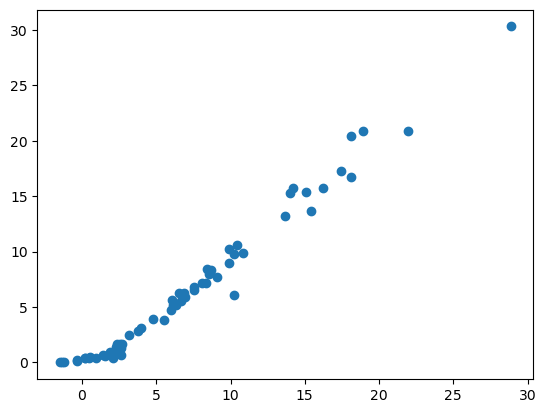

In [133]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
lasso_reg=Lasso()
lasso_reg.fit(X_train_scaled,y_train)
y_pred=lasso_reg.predict(X_test_scaled)
mae=mean_absolute_percentage_error(y_pred,y_test)
r2s=r2_score(y_pred,y_test)
print("Mean Absolute percentage error :",mae)
print("r2 score :",r2s)
plt.scatter(y_pred,y_test)

In [139]:
x=np.array(y_pred)


In [143]:
x

array([ 8.41048985,  8.08808298,  0.51644041,  5.52555166,  7.52621901,
        2.59636143,  3.18585506,  8.3533926 ,  2.25369685,  3.7735513 ,
        0.93464228, 10.24544   , 10.22326332, 17.45228183, 18.10812313,
        2.65345868,  2.08606068, -1.21895784,  7.53910475,  3.99277095,
        2.56317746,  0.23089335,  6.9606184 ,  0.22352139, 21.91784757,
        5.97687671,  6.06162389,  9.87324704, -1.47687523, 10.84040688,
        6.88142552,  0.49802064, 10.46276094, 14.21177306,  2.31263203,
        1.9128702 ,  2.36605343,  6.6345762 , -0.34941066, -0.30519914,
        6.52403728,  2.69950812,  8.66656932, -1.37370827, 16.23083992,
        8.52102877,  9.06635142,  1.56469185, 13.69591801,  1.44678096,
       28.87428582,  6.30295943, 18.09517661, 18.90215329, 13.99065469,
       15.38532761,  1.97182564,  9.92113441,  4.75361714, 15.11076757,
        6.12609311])

In [145]:
y=np.array(y_test)
y

array([ 8.4,  7.2,  0.5,  3.8,  6.5,  0.7,  2.5,  7.2,  0.9,  2.8,  0.4,
        6.1,  9.8, 17.3, 20.4,  1.3,  0.4,  0. ,  6.8,  3.1,  1.7,  0.4,
        5.9,  0.4, 20.9,  4.7,  5.6, 10.2,  0. ,  9.9,  6.3,  0.4, 10.6,
       15.7,  1.4,  0.9,  1.7,  5.5,  0.1,  0.2,  6.3,  1.7,  8.3,  0. ,
       15.7,  8. ,  7.7,  0.6, 13.2,  0.7, 30.3,  5.2, 16.7, 20.9, 15.3,
       13.7,  0.8,  9. ,  3.9, 15.4,  5.2])

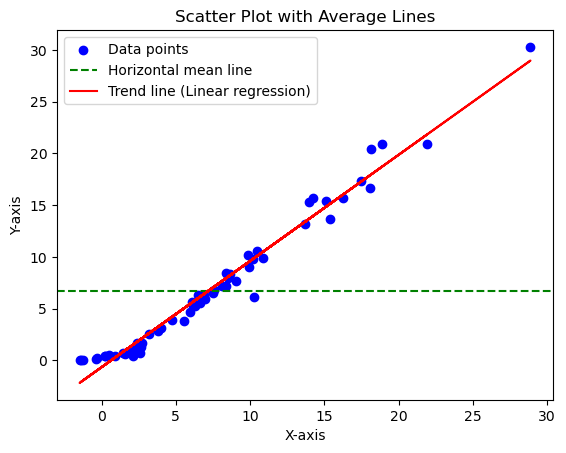

In [149]:
plt.scatter(x, y, color='blue', label='Data points')

# Horizontal average line
y_mean = np.mean(y)
plt.axhline(y=y_mean, color='green', linestyle='--', label='Horizontal mean line')

# Linear regression (Trend line)
x_reshaped = x.reshape(-1, 1)  # Reshape for sklearn
model = LinearRegression().fit(x_reshaped, y)
y_pred = model.predict(x_reshaped)
plt.plot(x, y_pred, color='red', label='Trend line (Linear regression)')

# Adding labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Average Lines')
plt.legend()
plt.show()

Mean absolute error : 0.9862070802884393
r2 score : 0.9699534726720015


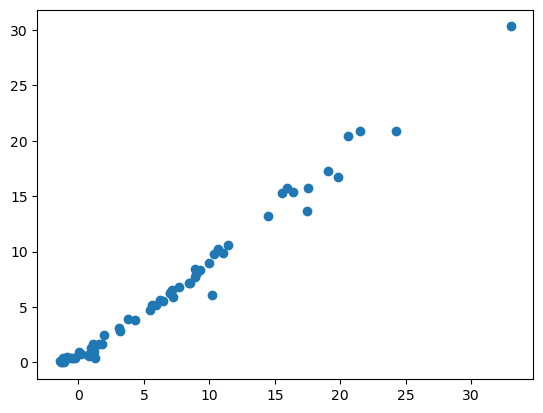

In [176]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge_regression=Ridge()
ridge_regression.fit(X_train_scaled,y_train)
y_pred=ridge_regression.predict(X_test_scaled)
mae=mean_absolute_error(y_pred,y_test)
r2e=r2_score(y_pred,y_test)
print("Mean absolute error :",mae)
print("r2 score :",r2e)
plt.scatter(y_pred,y_test)

Ridge with cross valudation

Mean absolute error : 0.9862070802884393
r2 score : 0.9699534726720015


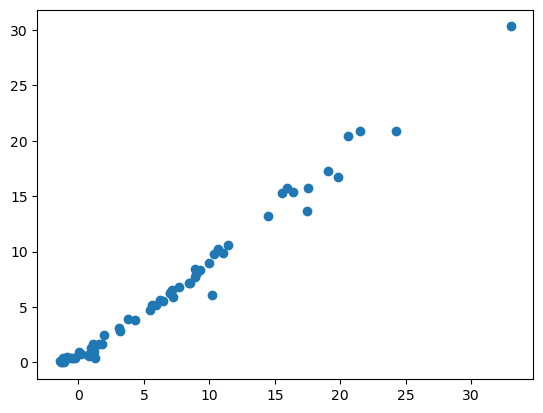

In [174]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=RidgeCV(cv=5)
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_pred,y_test)
r2e=r2_score(y_pred,y_test)
print("Mean absolute error :",mae)
print("r2 score :",r2e)
plt.scatter(y_pred,y_test)

ElasticNet Regression (Combination of Ridge and Lasso)

Mean absolute error : 1.6511868133560939
r2 score : 0.8707805115020995


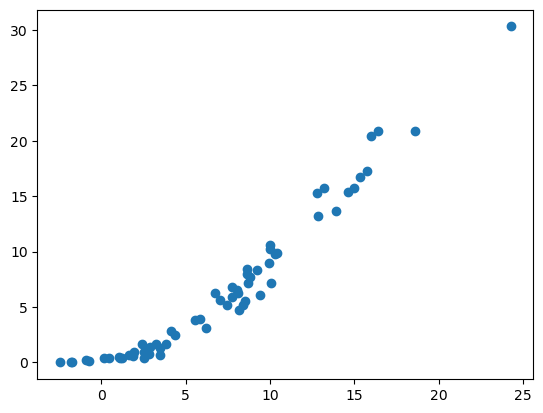

In [167]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_pred,y_test)
r2e=r2_score(y_pred,y_test)
print("Mean absolute error :",mae)
print("r2 score :",r2e)
plt.scatter(y_pred,y_test)

pickling the model and the standard-scaler

In [170]:
scaler

StandardScaler()

In [178]:
ridge

RidgeCV(cv=5)

In [180]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))